The main objective or goal of this project is to build a model to identify emails as abusive or non abusive on the given day based on the above inappropriate content.

The dataset contains more than 50000 emails

In [1]:
import pandas as pd
import numpy as np
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# EDA

In [2]:
email=pd.read_csv("emails1")
email.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [3]:
email.tail()

,Unnamed: 0,filename,Message-ID,content,Class
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive
48075,48075,campbell-l/notes_inbox/137.,<10677824.1075857876692.JavaMail.evans@thyme>,---------------------- Forwarded by Tamara Jae...,Non Abusive


In [4]:
# Data Structure
type(email)

pandas.core.frame.DataFrame

In [5]:
email.shape

(48076, 5)

In [6]:
# Datatypes
email.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

# Datatype Conversion

In [7]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
emails=email.drop(columns=['Unnamed: 0','filename','Message-ID'])
emails

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [9]:
# Checking for null values
emails.isnull().sum()

content    0
Class      0
dtype: int64

In [10]:
# Count of duplicated rows
emails[emails.duplicated()].shape

(23420, 2)

In [11]:
emails.duplicated().sum()

23420

In [12]:
emails.drop_duplicates(keep='first',inplace= True)

In [13]:
emails

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [14]:
emails.Class.value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

# Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
emails['Class'] = encoder.fit_transform(emails['Class'])
emails.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


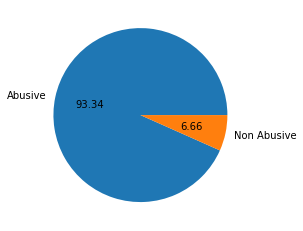

In [17]:
plt.pie(emails['Class'].value_counts(),labels=['Abusive','Non Abusive'],autopct='%0.2f')
plt.show()

Data is imbalanced

In [18]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# To check number of characters in the content of the email
emails['Char_length']= emails['content'].apply(len)
emails.head()

,content,Class,Char_length
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [20]:
# Word Count
emails['Word_count'] = emails['content'].apply(lambda x:len(nltk.word_tokenize(x)))
emails.head()

,content,Class,Char_length,Word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [21]:
# Number of sentences in content of the email
emails['Num_sent'] = emails['content'].apply(lambda x:len(nltk.sent_tokenize(x)))
emails

,content,Class,Char_length,Word_count,Num_sent
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2
...,...,...,...,...,...
47974,Do you need new leads for your business ?\n D...,1,1523,255,12
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",1,1126,244,12
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,1,892,164,9
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,1,932,189,10


In [22]:
# Describe for Non Abusive emails
emails[['Char_length','Word_count','Num_sent']].describe()

,Char_length,Word_count,Num_sent
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.351882,12.570409
std,5394.644531,818.222258,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [23]:
# Non Abusive
emails[emails['Class']==1][['Char_length','Word_count','Num_sent']].describe()

,Char_length,Word_count,Num_sent
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.184496,12.257539
std,5532.160062,832.095511,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [24]:
# Abusive
emails[emails['Class']==0][['Char_length','Word_count','Num_sent']].describe()

,Char_length,Word_count,Num_sent
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.697929,16.955542
std,2834.633786,590.602864,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


<AxesSubplot:xlabel='Char_length', ylabel='Count'>

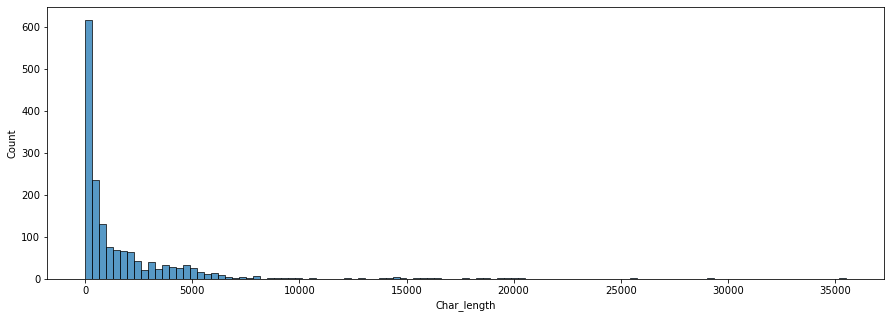

In [25]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(emails[emails['Class']==0]['Char_length'])

<AxesSubplot:xlabel='Char_length', ylabel='Count'>

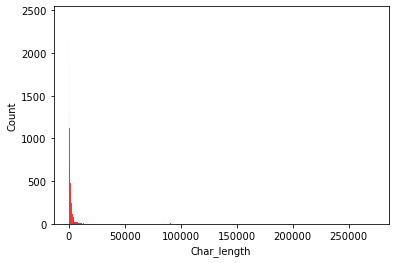

In [26]:
sns.histplot(emails[emails['Class']==1]['Char_length'],color='red')

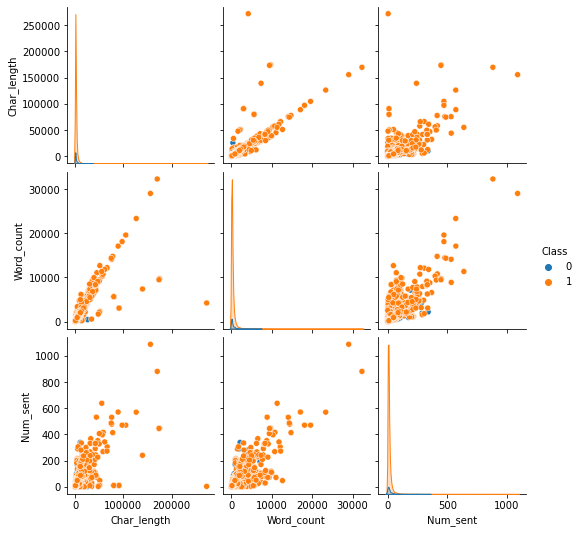

In [27]:
sns.pairplot(emails,hue='Class')

In [28]:
emails.corr()

,Class,Char_length,Word_count,Num_sent
Class,1.000000,0.005366,-0.000766,-0.043509
Char_length,0.005366,1.000000,0.834617,0.691452
Word_count,-0.000766,0.834617,1.000000,0.837706
Num_sent,-0.043509,0.691452,0.837706,1.000000


<AxesSubplot:>

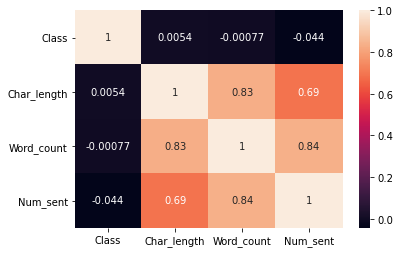

In [29]:
sns.heatmap(emails.corr(),annot=True)

# TEXT PROCESSING (Clean, Tokenize and Normalise)

In [30]:
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def tokenize(text):

   #1. Normalize the data by converting to lower case and removing punctuations
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
   #2. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
   #3. Remove stop words
    words = [w for w in tokens if w not in STOPWORDS]
    
    #4. Lemmatize 
    lemmed_words = [lemmatizer.lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

In [32]:
emails['cleantext']=emails['content'].apply(lambda x: tokenize(x))

In [33]:
emails.head()

,content,Class,Char_length,Word_count,Num_sent,cleantext
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john arnold...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshole john j lavorato excelr john arnold hou...


In [34]:
# assigning the independent features to X and the target variable to y
X = pd.DataFrame(emails['cleantext'])
y = emails['Class']

# Data Balancing

In [35]:
from imblearn.over_sampling import SMOTEN
oversample= SMOTEN(sampling_strategy=0.33)
X1,y1=oversample.fit_resample(X,y)

In [36]:
y1.shape

(30608,)

In [37]:
from collections import Counter
print(Counter(y))

Counter({1: 23014, 0: 1642})


In [38]:
print(Counter(y1))

Counter({1: 23014, 0: 7594})


# Split the dataset into Training and Testing datasets

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (21425, 1)
Shape of testing data: (9183, 1)


In [41]:
X_train.head()

,cleantext
5324,call today tomorrow morning list interviewer m...
20196,original message customernotices wgphou mailto...
13227,attached updated file summarizing action plan ...
14731,sally attached brief document material request...
18760,calendar entry appointment description john bu...


In [42]:
x_train = X_train.iloc[:,0]
x_train.head()

5324     call today tomorrow morning list interviewer m...
20196    original message customernotices wgphou mailto...
13227    attached updated file summarizing action plan ...
14731    sally attached brief document material request...
18760    calendar entry appointment description john bu...
Name: cleantext, dtype: object

# CountVectorizer - Feature Extraction

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=10000)

In [44]:
x= tfidf.fit_transform(x_train).toarray()

In [45]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
x.shape

(21425, 10000)

In [47]:
x_test = X_test.iloc[:,0]

In [48]:
x_test.head()

7228     forwarded eric bass hou ect k bass daphneco bi...
17497    office tomorrow returning monday october th ne...
17859    calendar entry appointment description prc rev...
14007    f japanese electricity newest item added daily...
6352     recently several question regarding excelr fit...
Name: cleantext, dtype: object

In [49]:
test_x = tfidf.transform(x_test)

In [50]:
print(test_x.toarray().shape)

(9183, 10000)


# Model Building


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
clf6= LogisticRegression(max_iter=5000)
clf6.fit(x,y_train)
y_pred = clf6.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2294
           1       0.96      1.00      0.98      6889

    accuracy                           0.97      9183
   macro avg       0.98      0.94      0.96      9183
weighted avg       0.97      0.97      0.97      9183



In [55]:
print(confusion_matrix(y_test, y_pred))

[[2028  266]
 [   5 6884]]


Logistic Regression gives the best accuracy

# Deployment

In [2]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(LogisticRegression,open('model.pkl','wb'))

NameError: name 'cv' is not defined